In [4]:
pip install basemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


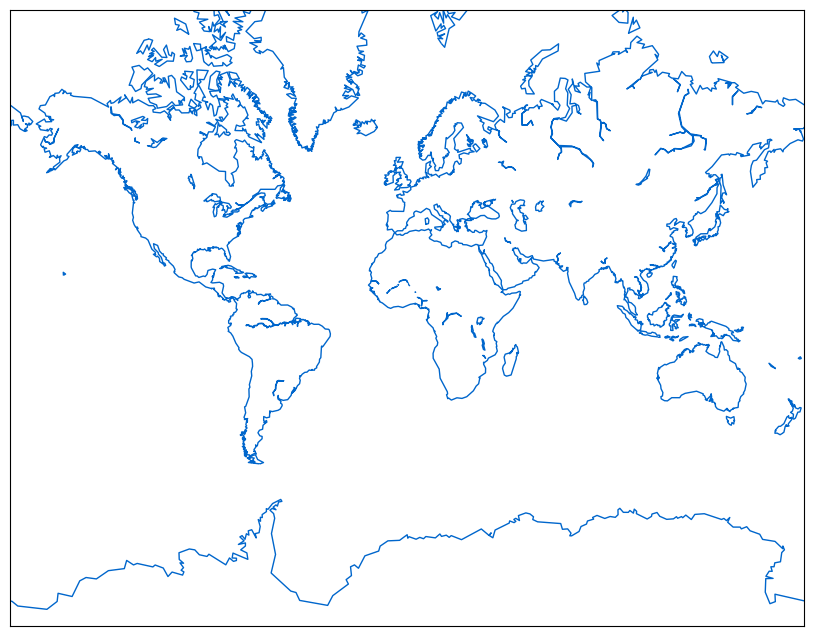

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
m = Basemap(projection='merc',urcrnrlat=80, llcrnrlat=-80,llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines(color='#0066CC')

{-180: ([<matplotlib.lines.Line2D at 0x79ece9bd42b0>], []),
 -120: ([<matplotlib.lines.Line2D at 0x79ece9bd44f0>], []),
 -60: ([<matplotlib.lines.Line2D at 0x79ece9bd4790>], []),
 0: ([<matplotlib.lines.Line2D at 0x79ece9bd4a30>], []),
 60: ([<matplotlib.lines.Line2D at 0x79ece9bd4cd0>], []),
 120: ([<matplotlib.lines.Line2D at 0x79ece9bd4f70>], []),
 180: ([<matplotlib.lines.Line2D at 0x79ece9bd5210>], [])}

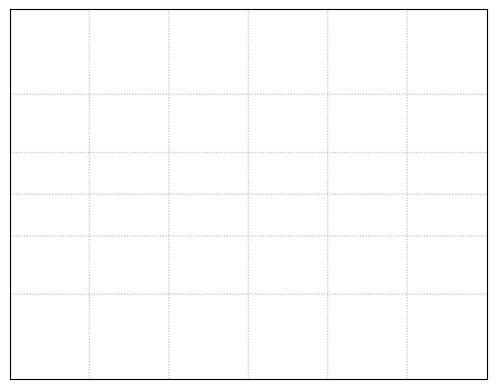

In [2]:
m.drawparallels(range(-90,91,30), color='#CCCCCC')
m.drawmeridians(range(-180,181,60), color='#CCCCCC')

In [3]:
import numpy as np

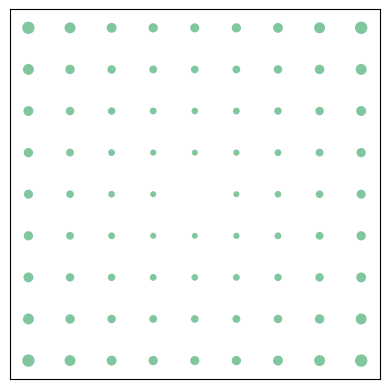

In [6]:
# draw tissot's indicatrix to show distortion.
for y in np.linspace(m.ymax/20, 19*m.ymax/20, 9):
    for x in np.linspace(m.xmax/20, 19*m.xmax/20, 9):
        lon, lat = m(x,y,inverse=True)
        poly = m.tissot(lon, lat, 1.5, 100, facecolor='#2ca25f', zorder=10, alpha=0.6);

plt.show()

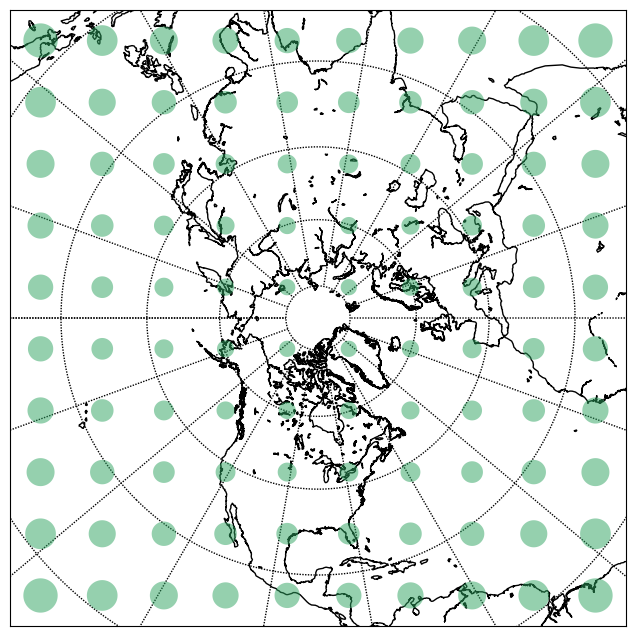

In [4]:
plt.figure(figsize=(16,8))
m = Basemap(projection='npstere',boundinglat=10,lon_0=270,resolution='l')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

for y in np.linspace(m.ymax/20,19*m.ymax/20,10):
    for x in np.linspace(m.xmax/20,19*m.xmax/20,10):
        lon, lat = m(x,y,inverse=True)
        poly = m.tissot(lon,lat,2.5,100,\
                        facecolor='#2ca25f',zorder=10,alpha=0.5)
plt.show()

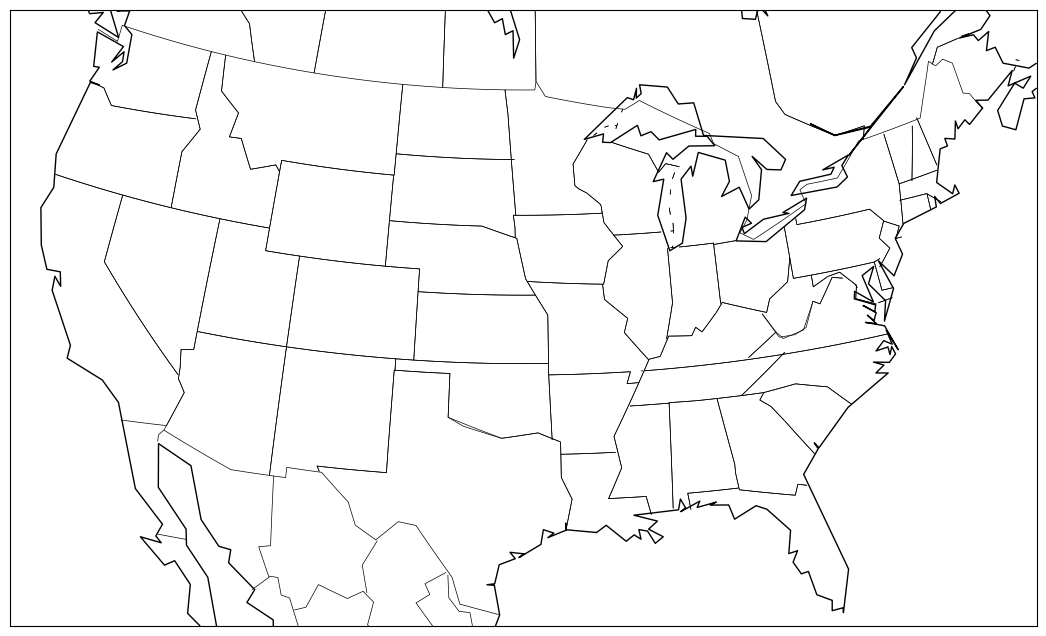

In [7]:
plt.figure(figsize=(16,8))
m = Basemap(width=5e6,height=3e6,projection='laea',boundinglat=10,
        resolution='c',lat_0=39, lon_0=-96)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
plt.show()

<Figure size 1600x800 with 0 Axes>

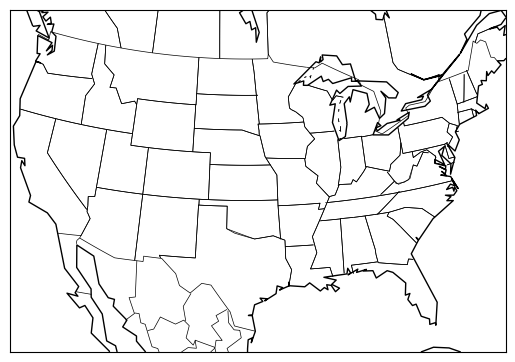

In [8]:
plt.figure(figsize=(16,8))
plt.figure()
m = Basemap(
    llcrnrlon=-119,
    llcrnrlat=22,
    urcrnrlon=-64,
    urcrnrlat=49,
    projection='lcc',
    lat_1=39,
    lon_0=-98
   )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
plt.show()

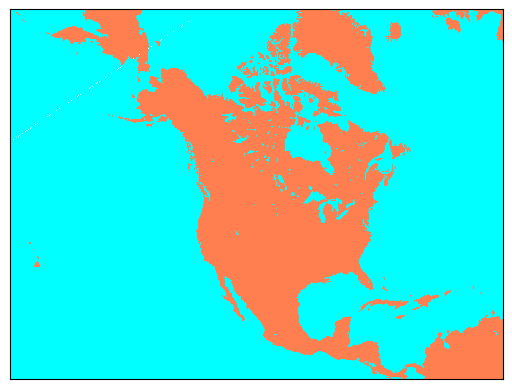

In [17]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# draw a land-sea mask for a map background.
# lakes=True means plot inland lakes with ocean color.
m.drawlsmask(land_color='coral',ocean_color='aqua',lakes=True)
plt.show()

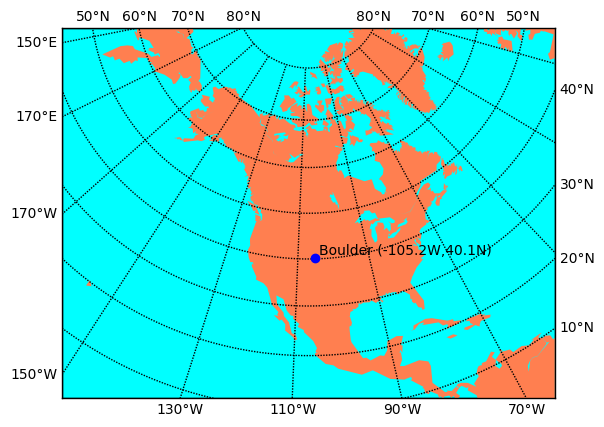

In [21]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# setup Lambert Conformal basemap.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left
parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])
# plot blue dot on Boulder, colorado and label it as such.
lon, lat = -105.237, 40.125 # Location of Boulder
# convert to map projection coords.
# Note that lon,lat can be scalars, lists or numpy arrays.
xpt,ypt = m(lon,lat)
# convert back to lat/lon
lonpt, latpt = m(xpt,ypt,inverse=True)
m.plot(xpt,ypt,'bo')  # plot a blue dot there
# put some text next to the dot, offset a little bit
# (the offset is in map projection coordinates)
plt.text(xpt+100000,ypt+100000,'Boulder (%5.1fW,%3.1fN)' % (lonpt,latpt))
plt.show()